# Do we need to include crowding in the field?

I'm using the TRILEGAL data from /projects/p30137/ageller/testing/EBLSST/newField


In [20]:
import pandas as pd
import numpy as np

from astropy.coordinates import SkyCoord
from astropy import units

import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv('outputFilesHead.csv')
df

,OpSimID,OpSimRA,OpSimDec,NstarsTRILEGAL,NOpSimObs_u,NOpSimObs_g,NOpSimObs_r,NOpSimObs_i,NOpSimObs_z,NOpSimObs_y
0,1.0,0.000000,-90.000000,200116.0,26,26,25,26,27,28
1,2.0,180.000000,-87.568555,240163.0,27,26,27,27,27,29
2,3.0,324.000429,-87.568550,195548.0,27,27,26,27,28,29
3,4.0,35.999571,-87.568550,174438.0,25,25,25,25,26,28
4,5.0,252.001105,-87.568547,246030.0,27,27,27,27,29,30
5,6.0,107.998895,-87.568547,213873.0,25,25,24,25,25,27
6,7.0,215.999822,-85.272913,326308.0,27,26,28,28,28,30
7,8.0,144.000178,-85.272913,259550.0,26,26,25,26,27,28
8,9.0,0.000000,-85.272892,166990.0,26,26,25,26,28,28
9,10.0,288.000508,-85.272852,233733.0,27,27,27,27,29,30


In [22]:
print(max(df['NstarsTRILEGAL']))

16820238186.206203


I am giving TRILEGAL an area of 10 square degrees, but the true LSST FoV is 3.5 degree in diameter

In [23]:
#get the ratio of the LSST FoV and the 10 deg that I used in TRILEGAL
#from the TRILEGAL code
area = np.pi*(3.5/2.)**2. #square degrees (LSST FoV)
seeing = 0.5 #arcsec
surfaceDensity = df['NstarsTRILEGAL']/area

#stars/resolution element
resEl = np.pi*(seeing/2./3600.)**2. 
starsPerResEl = np.array(surfaceDensity*resEl)

print(max(starsPerResEl))

26.486895606900674


In [24]:
#will check 3 times the resolution element for crowding
dLim = 3.

In [25]:
yy = np.where(starsPerResEl*(2.*dLim)**2. >= 1)[0]
print(len(yy))
print(df.iloc[yy])

63
      OpSimID     OpSimRA   OpSimDec  NstarsTRILEGAL  NOpSimObs_u  \
291     292.0  198.517800 -62.802646    9.036244e+07           29   
301     302.0  180.000000 -62.510696    5.327197e+07           29   
316     317.0  216.000042 -61.126884    3.407009e+07           29   
336     337.0  174.247015 -60.981226    3.210480e+07           29   
392     393.0  224.918474 -58.380320    2.058391e+07           27   
409     410.0  158.754141 -57.958073    2.038854e+07           29   
486     487.0  237.524293 -54.543205    3.137094e+07           27   
583     584.0  243.136057 -50.859905    2.081259e+07           27   
710     711.0  247.887416 -46.963166    3.998091e+07           27   
892     894.0  255.762192 -41.413602    9.686573e+08           27   
900     902.0  266.791666 -41.228244    2.331670e+07           27   
916     918.0  263.034816 -40.550569    9.741490e+07           27   
920     922.0  251.999992 -40.103694    2.177060e+07           27   
954     956.0  259.309208 -39.7

In [26]:
for i in yy:
    #print('mv ' + str(int(df['OpSimID'].iloc[i])).zfill(4) + 'output_file.csv ../output_files_oldCrowding')
        print('rm -f ' + str(int(df['OpSimID'].iloc[i])).zfill(4) + 'output_file.csv')

rm -f 0292output_file.csv
rm -f 0302output_file.csv
rm -f 0317output_file.csv
rm -f 0337output_file.csv
rm -f 0393output_file.csv
rm -f 0410output_file.csv
rm -f 0487output_file.csv
rm -f 0584output_file.csv
rm -f 0711output_file.csv
rm -f 0894output_file.csv
rm -f 0902output_file.csv
rm -f 0918output_file.csv
rm -f 0922output_file.csv
rm -f 0956output_file.csv
rm -f 0990output_file.csv
rm -f 1006output_file.csv
rm -f 1079output_file.csv
rm -f 1095output_file.csv
rm -f 1097output_file.csv
rm -f 1109output_file.csv
rm -f 1117output_file.csv
rm -f 1173output_file.csv
rm -f 1185output_file.csv
rm -f 1189output_file.csv
rm -f 1203output_file.csv
rm -f 1211output_file.csv
rm -f 1219output_file.csv
rm -f 1284output_file.csv
rm -f 1292output_file.csv
rm -f 1304output_file.csv
rm -f 1314output_file.csv
rm -f 1332output_file.csv
rm -f 1364output_file.csv
rm -f 1392output_file.csv
rm -f 1404output_file.csv
rm -f 1412output_file.csv
rm -f 1446output_file.csv
rm -f 1463output_file.csv
rm -f 1505ou

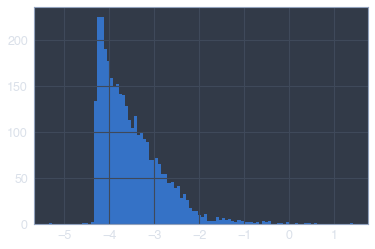

In [8]:
f, ax = plt.subplots()
xx = np.where(starsPerResEl > 0)
_ = ax.hist(np.log10(starsPerResEl[xx]), bins=100)

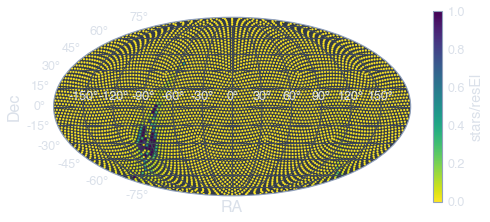

In [34]:
xx = np.where(starsPerResEl == 0)
starsPerResEl[xx] = 1e-10

coords = SkyCoord(df['OpSimRA'], df['OpSimDec'], unit=(units.degree, units.degree),frame='icrs')

RAwrap = coords.ra.wrap_at(180.*units.degree).degree
Decwrap = coords.dec.wrap_at(180.*units.degree).degree

f, ax = plt.subplots(subplot_kw={'projection': "mollweide"}, figsize=(8,5))
ax.grid(True)
ax.set_xlabel("RA",fontsize=16)
ax.set_ylabel("Dec",fontsize=16)
mlw = ax.scatter(np.array(RAwrap).ravel()*np.pi/180., 
                 np.array(Decwrap).ravel()*np.pi/180., 
                 c=starsPerResEl*dLim**2.,
                 cmap='viridis_r', s = 4, vmin=0, vmax=1)
cbar = f.colorbar(mlw, shrink=0.7)
cbar.set_label(r'stars/resEl')


# Test the full code, like it is with the driver

In [1]:
import numpy as np
import pandas as pd

from astropy import units, constants
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

import sys
sys.path.insert(0, '/Users/ageller/WORK/LSST/onGitHub/EBLSST/code')
from newLSSTEBWorker import LSSTEBWorker
from OpSim import OpSim
%load_ext autoreload
%autoreload 2

/Users/ageller/anaconda3/lib/python3.7/site-packages/pysynphot/refs.py:118: UserWarning: No graph or component tables found; functionality will be SEVERELY crippled. No files found for /Users/ageller/python_scripts/PySynphotData/mtab/*_tmg.fits
  'functionality will be SEVERELY crippled. ' + str(e))
/Users/ageller/anaconda3/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /Users/ageller/python_scripts/PySynphotData/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/Users/ageller/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:2286: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [2]:
OpS = OpSim()
OpS.dbFile = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/db/baseline2018a.db'
#OpS.getCursors()
OpS.getAllOpSimFields()

getting OpSim fields...
have summary cursor.
have field cursor.
returned 5292 fields


In [3]:
#OpSimi = 292 #having trouble downloading the model, so I will use one that I already have
OpSimi = 2412
worker = LSSTEBWorker()
worker.filterFilesRoot = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/filters/'
worker.OpSim = OpS
worker.seed = 1111
worker.initialize(OpSimi)

total number of OpSim observation dates (all filters) = 951.0


True

In [4]:
worker.galDir = 'TRILEGALmodels'
#using these flags so that I don't have to download each time
worker.getGalaxy(OpSimi, deleteModel = False, downloadModel = False)#, area0frac = 0.01) 

downloaded TRILEGAL model for ID=2413.0, RA=253.606593, DEC=-5.090318, Nstars=409023.0, Nstars/resEl=0.0006440901360544218


In [5]:
#force there to be crowding
worker.Galaxy.starsPerResEl = 1

In [6]:
worker.n_bin = 100
gxDat = worker.sampleGalaxy()

creating binaries...


/Users/ageller/anaconda3/lib/python3.7/site-packages/astropy/modeling/powerlaws.py:53: RuntimeWarning: invalid value encountered in power
  return amplitude * xx ** (-alpha)


In [13]:
line = gxDat[0]
#change the inclination
line[12] = np.pi/2.
#change the period
line[2] = np.log10(3.47)
print(line)

worker.getEB(line, OpSimi=OpSimi)

[ 6.44000000e-01  2.46000000e-01  5.40329475e-01  8.59314391e-01
  5.98379556e-01  2.39608029e-01  2.54683025e-01  1.38038426e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  5.49540874e+00
  1.57079633e+00  3.90621048e-01  2.36466858e+00  7.57000000e-01
 -1.25000000e+00  5.32108259e+03  4.06443329e+03  4.69300000e+00
  5.07000000e+00  2.05850000e+01]
getting crowding ... 
crowding Ncluster, Ngalaxy 0 39
crowding mag {'u_': 16.897314545014105, 'g_': 16.582751993513977, 'r_': 16.270597227460375, 'i_': 16.08107344371092, 'z_': 15.966003579718555, 'y_': 15.89992648862005}


In [14]:
worker.EB.crowding.galaxySingles

,xAng,yAng,M_H,dist,AV,mass_1,logg,rad_1,lumin_1,teff_1,flux_u_,flux_g_,flux_r_,flux_i_,flux_z_,flux_y_
0,0.702177,0.337790,-1.29,5.248075,0.780,0.570,4.769,0.515788,0.134276,4886.523593,7.40847046854724e-10,3.089013099486847e-09,5.887946258846046e-09,7.4025788695605616e-09,8.145868473653318e-09,8.714883226965598e-09
1,0.837980,-0.586454,-1.13,6.918310,0.845,0.667,4.659,0.633281,0.303389,5407.543229,1.7057681772396914e-09,5.0086589300877535e-09,8.099704028313988e-09,9.470536187403525e-09,9.968647534740664e-09,1.0247407276921646e-08
2,-1.078401,-1.351806,-0.13,1.258925,0.839,0.774,4.618,0.715162,0.266073,4931.738040,1.9100544484400375e-08,1.048747387477834e-07,2.1098695503476486e-07,2.606076225420434e-07,2.8299383997947817e-07,3.030030348149298e-07
3,-0.168640,0.545227,-1.27,12.589254,0.813,0.823,4.252,1.123916,1.976970,6486.344335,5.791669265269766e-09,1.2463285177157687e-08,1.541078084733914e-08,1.6081885918712132e-08,1.5823577750264245e-08,1.540707234533089e-08
4,-1.209125,-0.978590,-1.79,10.000000,0.873,0.628,4.713,0.577449,0.263027,5470.159629,8.330647204075828e-10,2.096155399704124e-09,3.2765211619834012e-09,3.8340060122021515e-09,4.04264053272513e-09,4.133315605949046e-09
5,-1.271935,-1.120915,-1.55,26.302680,0.900,0.652,4.675,0.614692,0.314051,5546.257130,1.480722063830585e-10,3.711131013427484e-10,5.70228647726602e-10,6.595932157870497e-10,6.904760126068158e-10,7.028959822822331e-10
6,0.506933,-0.891513,0.05,0.724436,0.709,0.272,5.015,0.268422,0.010375,3572.728382,3.894425408805923e-10,3.4847745315087e-09,1.0685434430756576e-08,2.4743054263054307e-08,3.756857914451476e-08,4.840013433792236e-08
7,1.266198,-0.886436,-1.41,11.481536,0.900,0.802,4.343,0.999128,1.534617,6456.542290,5.453790803621981e-09,1.1464756459623283e-08,1.4250134299183386e-08,1.4942078718304223e-08,1.4749506700412678e-08,1.4374297701059973e-08
8,-1.173615,-0.390660,-1.09,6.606934,0.897,0.656,4.674,0.617285,0.264850,5296.634439,1.4422047294937605e-09,4.6122266804480134e-09,7.726892183303295e-09,9.154622927804846e-09,9.713928272808051e-09,1.0066699879827719e-08
9,-0.530230,-1.042371,-0.67,2.884032,0.848,0.361,4.970,0.325677,0.027733,4149.540426,1.401943952838158e-10,1.145802827931077e-09,3.2512418927143973e-09,4.863026860021161e-09,5.882587616396496e-09,6.761108240801412e-09


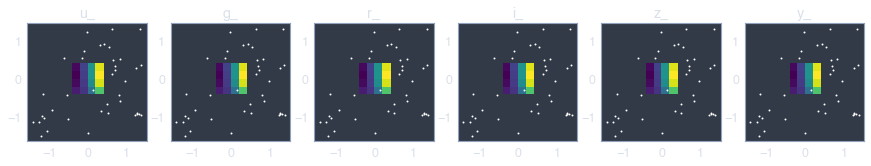

In [18]:
f,ax = plt.subplots(1,6, figsize=(15, 5))

for i,f in enumerate(worker.filters):
    ax[i].pcolormesh(worker.EB.crowding.xgrid, worker.EB.crowding.ygrid, 
                     worker.EB.crowding.fluxgrid[f])#, norm=colors.LogNorm())
    ax[i].set_aspect(1)
    ax[i].set_title(f)
    ax[i].scatter(worker.EB.crowding.galaxySingles["xAng"],
                  worker.EB.crowding.galaxySingles["yAng"], 
                  s=3, color='white')

In [16]:
worker.EB.crowding.fluxgrid['r_']

array([[3.15625178e-07, 3.52455485e-07, 4.72404471e-07, 6.64992891e-07,
        8.77268904e-07],
       [2.85460868e-07, 3.64935078e-07, 5.32064495e-07, 7.77550058e-07,
        1.04095910e-06],
       [2.71714445e-07, 3.69215272e-07, 5.52832258e-07, 8.13373615e-07,
        1.08892928e-06],
       [2.82607486e-07, 3.78065231e-07, 5.49695446e-07, 7.86702361e-07,
        1.03159209e-06],
       [3.24777145e-07, 4.11380435e-07, 5.58015788e-07, 7.48883211e-07,
        9.33053907e-07]])